## Pandas and NumPy

With NumPy, we can easily work across multiple dimensions, making our code more readable and efficient through vectorized operations.

But, sadly, even NumPy has its limitations:

- It doesn't support column names, so we must frame questions as multi-dimensional array operations.
- It only allows for one data type per ndarray, complicating the handling of mixed numeric and string data.
- While there are many low-level methods, some common analysis patterns lack pre-built methods.

Fear not, for pandas 🐼 is here to the rescue! Pandas is an incredibly versatile and user-friendly Python library designed to make our data exploration and analysis journey both fun and efficient. It gets its name from the econometrics term "panel data." With pandas, we'll be able to easily manipulate, clean, and visualize data, all while enjoying the process. Pandas is not a replacement for NumPy, but rather a powerful library that builds upon NumPy's strengths. While pandas uses NumPy under the hood, it provides higher-level data structures and tools specifically designed for data analysis.

Introducing the hero of our story: the pandas [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)! DataFrames are pandas' answer to NumPy's 2D ndarrays, but with some game-changing enhancements:

- Axis values can have string labels, not just numeric ones.
- DataFrames can contain columns with multiple data types, including: integer, float, string, boolean, datetime, and more.

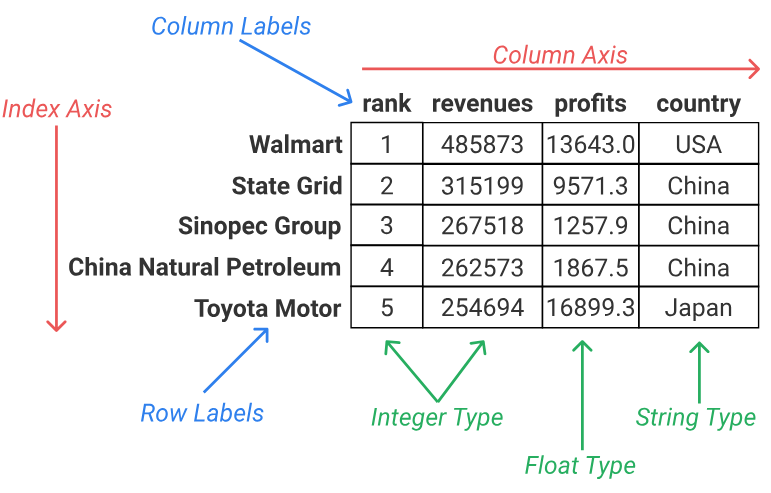

Get ready to bring your data handling skills to a new level as we discover the power of pandas!

## Introduction to the Data

As we explore the versatility of pandas, we'll use a dataset from [Fortune](http://fortune.com/) magazine's [2017 Global 500 list](https://en.wikipedia.org/wiki/Fortune_Global_500). This list ranks the top 500 corporations worldwide by revenue. The dataset was initially compiled [here](https://en.wikipedia.org/wiki/Fortune_Global_500), but we've tweaked it to make it more learner-friendly.

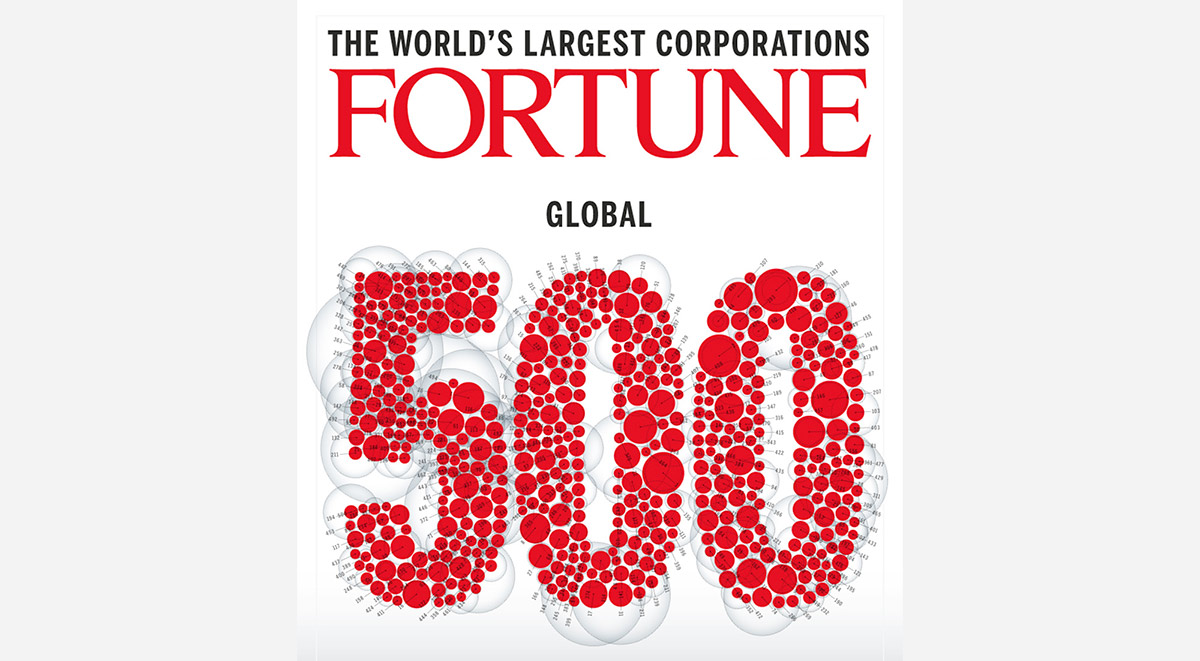

Our dataset is a CSV file called f500.csv. To help us understand the data better, here's a handy data dictionary for some of the columns in the CSV:

- company: The company's name.
- rank: Global 500 rank for the company.
- revenues: Company's total revenue for the fiscal year, in millions of dollars (USD).
- revenue_change: Percentage change in revenue between the current and prior fiscal year.
- profits: Net income for the fiscal year, in millions of dollars (USD).
- ceo: Company's Chief Executive Officer.
- industry: The company's industry of operation.
- sector: Sector in which the company operates.
- previous_rank: Global 500 rank for the company for the prior year.
- country: Country of the company's headquarters.

When working with pandas, we follow the conventional import method, similar to NumPy (import numpy as np):

In [1]:
import pandas as pd

In [13]:
f500 = pd.read_csv('../Datasets/f500.csv', index_col=0)
f500.index.name = 0
f500.head()

,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
0,,,,,,,,,,,,,,,,
Walmart,1,485873,0.8,13643.0,198825,-7.2,C. Douglas McMillon,General Merchandisers,Retailing,1,USA,"Bentonville, AR",http://www.walmart.com,23,2300000,77798
State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Energy,2,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456
Sinopec Group,3,267518,-9.1,1257.9,310726,-65.0,Wang Yupu,Petroleum Refining,Energy,4,China,"Beijing, China",http://www.sinopec.com,19,713288,106523
China National Petroleum,4,262573,-12.3,1867.5,585619,-73.7,Zhang Jianhua,Petroleum Refining,Energy,3,China,"Beijing, China",http://www.cnpc.com.cn,17,1512048,301893
Toyota Motor,5,254694,7.7,16899.3,437575,-12.3,Akio Toyoda,Motor Vehicles and Parts,Motor Vehicles & Parts,8,Japan,"Toyota, Japan",http://www.toyota-global.com,23,364445,157210


In [11]:
type(f500)

pandas.core.frame.DataFrame

In [12]:
f500.shape

(500, 16)

## Introducing DataFrames

We just saw that our data has 500 rows, 16 columns, and is stored as a pandas.core.frame.DataFrame object — or simply a DataFrame, which is the main pandas data structure.

Remember, one of the key features that makes pandas perfect for working with data is its support for string columns and row labels:

- **Axis values can have string labels, not just numeric ones.**
- DataFrames can contain columns with multiple data types, including: integer, float, string, and datetime.

## Viewing Rows from the Top

Now, let's see this in action! To get a look at the first few rows of our DataFrame, we can use the DataFrame.head() method. By default, it returns the first five rows of our DataFrame. However, it also accepts an optional integer argument, which specifies the number of rows to display:

In [14]:
f500.head(3)

,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
0,,,,,,,,,,,,,,,,
Walmart,1,485873,0.8,13643.0,198825,-7.2,C. Douglas McMillon,General Merchandisers,Retailing,1,USA,"Bentonville, AR",http://www.walmart.com,23,2300000,77798
State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Energy,2,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456
Sinopec Group,3,267518,-9.1,1257.9,310726,-65.0,Wang Yupu,Petroleum Refining,Energy,4,China,"Beijing, China",http://www.sinopec.com,19,713288,106523


This displays a neat table showing the top 3 companies in the dataset.

## Viewing Rows from the Bottom

Similarly, we can use the DataFrame.tail() method to reveal the last rows of our DataFrame:

In [15]:
f500.tail(3)

,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
0,,,,,,,,,,,,,,,,
Wm. Morrison Supermarkets,498,21741,-11.3,406.4,11630,20.4,David T. Potts,Food and Drug Stores,Food & Drug Stores,437,Britain,"Bradford, Britain",http://www.morrisons.com,13,77210,5111
TUI,499,21655,-5.5,1151.7,16247,195.5,Friedrich Joussen,Travel Services,Business Services,467,Germany,"Hanover, Germany",http://www.tuigroup.com,23,66779,3006
AutoNation,500,21609,3.6,430.5,10060,-2.7,Michael J. Jackson,Specialty Retailers,Retailing,0,USA,"Fort Lauderdale, FL",http://www.autonation.com,12,26000,2310


This presents another table, this time showcasing the bottom 3 companies in the dataset.

- Axis values can have string labels, not just numeric ones.
- **DataFrames can contain columns with multiple data types, including: integer, float, and string.**

To learn about the types of each column, we can use the [DataFrame.dtypes attribute](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html), similar to NumPy's [ndarray.dtype](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.dtype.html) attribute.

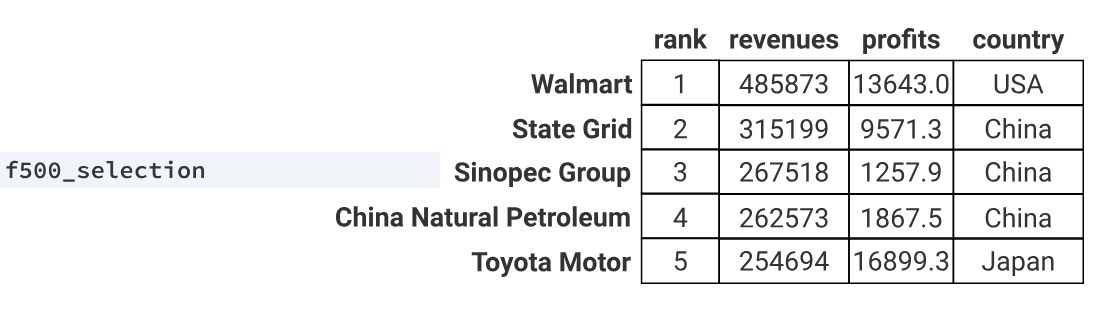

In [16]:
f500.dtypes

rank                          int64
revenues                      int64
revenue_change              float64
profits                     float64
assets                        int64
profit_change               float64
ceo                          object
industry                     object
sector                       object
previous_rank                 int64
country                      object
hq_location                  object
website                      object
years_on_global_500_list      int64
employees                     int64
total_stockholder_equity      int64
dtype: object

Here, we can see three different data types or dtypes.

You may recognize the float64 dtype from our work in NumPy. Pandas uses NumPy dtypes for numeric columns, including int64. Additionally, there's a type we haven't seen before: object. This is used for columns containing data that doesn't fit into any other dtypes, typically for columns with string values.

When we import data, pandas tries to guess the correct dtype for each column. In general, pandas does a great job, so we don't need to worry about specifying dtypes every time we work with data.

If we want an overview of all the dtypes used in our DataFrame, along with its shape and other information, we can use the [DataFrame.info() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html). Keep in mind that DataFrame.info() prints the information automatically without having to make a call the print() function. In fact, it returns the [Python None object](https://docs.python.org/3/c-api/none.html) so we can't assign the information to a variable like we have been doing.

In [17]:
f500.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Walmart to AutoNation
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rank                      500 non-null    int64  
 1   revenues                  500 non-null    int64  
 2   revenue_change            498 non-null    float64
 3   profits                   499 non-null    float64
 4   assets                    500 non-null    int64  
 5   profit_change             436 non-null    float64
 6   ceo                       500 non-null    object 
 7   industry                  500 non-null    object 
 8   sector                    500 non-null    object 
 9   previous_rank             500 non-null    int64  
 10  country                   500 non-null    object 
 11  hq_location               500 non-null    object 
 12  website                   500 non-null    object 
 13  years_on_global_500_list  500 non-null    int64  
 14  em

## Selecting a Column from a DataFrame by Label

From above, we got some information about our data with the useful DataFrame.info() method. We learned the number of rows, number of columns, data types used for each column, and memory usage of our dataset. But, it's time to go deeper into the world of pandas and learn how to select specific data points!

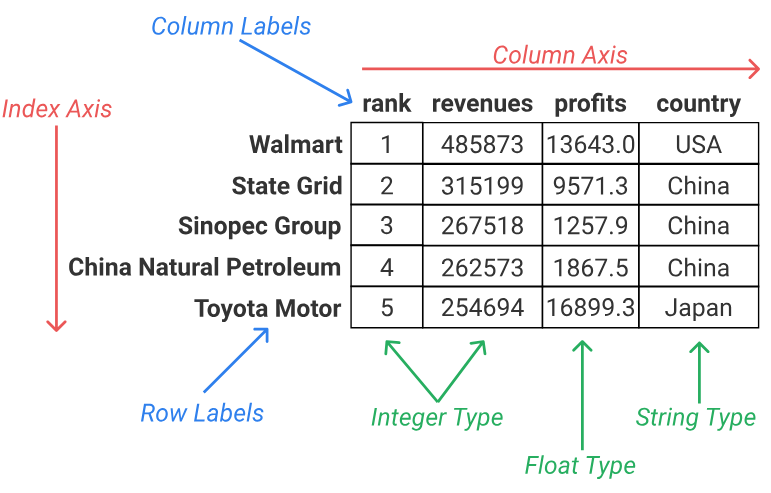

## Labels

Pandas labels are our friends. There are two types of labels in pandas: Row Labels and Column Labels. Unlike NumPy, where we needed to know the exact index location, pandas allows us to select data using these friendly labels. The secret weapon? The [DataFrame.loc[] attribute](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)! Check out its syntax below:

df.loc[row_label, column_label]

Notice that we use square brackets ([]), not parentheses (()), when selecting by location.

By the way, you'll often see df used as shorthand for a generic DataFrame object in our examples and in the official pandas documentation. Just know that when you see it, it just means that df is a pandas DataFrame object that was created using pandas.DataFrame().

## Select a Single Column

Now, let's work through an example together using a slice of our data

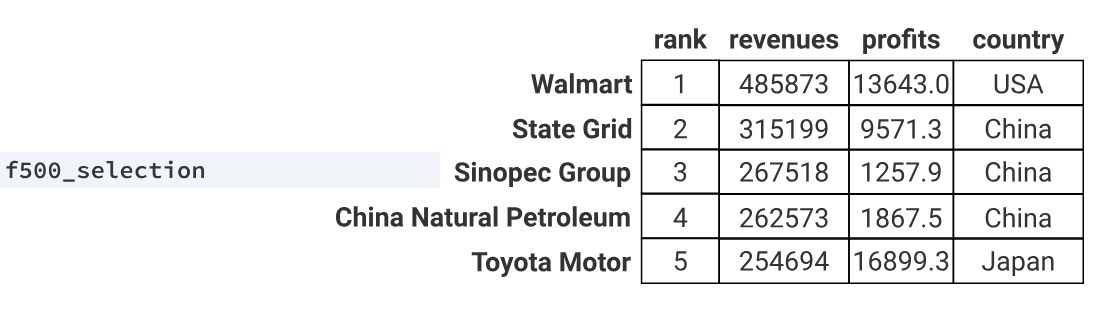

Let's select a single column by specifying a single label:

In [19]:
f500.loc[:, 'rank']

0
Walmart                             1
State Grid                          2
Sinopec Group                       3
China National Petroleum            4
Toyota Motor                        5
                                 ... 
Teva Pharmaceutical Industries    496
New China Life Insurance          497
Wm. Morrison Supermarkets         498
TUI                               499
AutoNation                        500
Name: rank, Length: 500, dtype: int64

Did you notice we used : to select all rows? And the new DataFrame shares the same row labels as the original!

For an even quicker way to select a single column, we can use this shortcut that doesn't need the .loc attribute or : to select all the rows:

In [20]:
f500['rank']

0
Walmart                             1
State Grid                          2
Sinopec Group                       3
China National Petroleum            4
Toyota Motor                        5
                                 ... 
Teva Pharmaceutical Industries    496
New China Life Insurance          497
Wm. Morrison Supermarkets         498
TUI                               499
AutoNation                        500
Name: rank, Length: 500, dtype: int64

This shortcut for selecting a single column is super popular, and we'll use it throughout our lessons.

In [21]:
f500['industry']

0
Walmart                                     General Merchandisers
State Grid                                              Utilities
Sinopec Group                                  Petroleum Refining
China National Petroleum                       Petroleum Refining
Toyota Motor                             Motor Vehicles and Parts
                                               ...               
Teva Pharmaceutical Industries                    Pharmaceuticals
New China Life Insurance          Insurance: Life, Health (stock)
Wm. Morrison Supermarkets                    Food and Drug Stores
TUI                                               Travel Services
AutoNation                                    Specialty Retailers
Name: industry, Length: 500, dtype: object

## Introduction to Series

We just saw that when we selected just one column of our DataFrame, we were returned to a new pandas object: a pandas.Series object. Whenever we come across a 1D pandas object, it's a Series. And when we see a 2D pandas object, it's a DataFrame.

Think of a DataFrame as a team of Series objects working together, much like how pandas organizes the data behind the scenes.

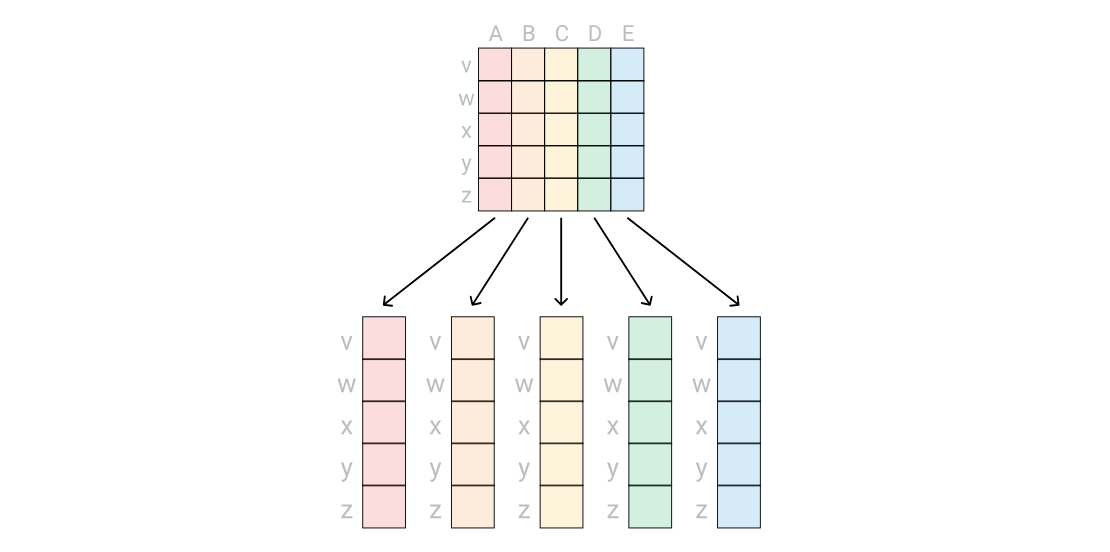

As we continue our journey into data selection with pandas, keep an eye on which objects are DataFrames and which ones are Series. The functions, methods, attributes, and syntax available to us will vary depending on the type of pandas object we're working with. This distinction will help us become master of pandas!

Let's see how to select multiple columns!

## Select a List of Specific Columns

In [22]:
f500.loc[:, ['country', 'rank']]

,country,rank
0,,
Walmart,USA,1
State Grid,China,2
Sinopec Group,China,3
China National Petroleum,China,4
Toyota Motor,Japan,5
...,...,...
Teva Pharmaceutical Industries,Israel,496
New China Life Insurance,China,497
Wm. Morrison Supermarkets,Britain,498


Since the object returned is two-dimensional, we've got a DataFrame, not a Series. As an alternative to using df.loc[:, ["col1", "col2"]] to select a specific list of columns, we can use the shorthand syntax df[["col1", "col2"]] to achieve the same result.

This "double bracket syntax" is often a source of confusion for many learners. Here's a little trick that can help with that. Think of the "first set" of brackets as belonging to the indexing operation, and the "second set" of brackets as defining a list object. Anytime we're making a selection, we'll need that first set of brackets, but that second set will only be necessary if we need to use a list to make our selection. No need for a list? Well, then there's no need to use nested brackets!

## Select a Slice of Columns

In [23]:
f500.loc[:, 'rank':'profits']

,rank,revenues,revenue_change,profits
0,,,,
Walmart,1,485873,0.8,13643.0
State Grid,2,315199,-4.4,9571.3
Sinopec Group,3,267518,-9.1,1257.9
China National Petroleum,4,262573,-12.3,1867.5
Toyota Motor,5,254694,7.7,16899.3
...,...,...,...,...
Teva Pharmaceutical Industries,496,21903,11.5,329.0
New China Life Insurance,497,21796,-13.3,743.9
Wm. Morrison Supermarkets,498,21741,-11.3,406.4


Once again, the object returned is a DataFrame. But notice we get all the columns from the first column label up to and including the last column label in our slice. This is different than most of the slicing we do in Python where the last element is not usually included – pandas does things a little differently! Also, keep in mind that there's no shortcut for selecting column slices; we need to use the .loc attribute and include : for selecting all the rows.

Here's a summary of the techniques we've learned for selecting columns:

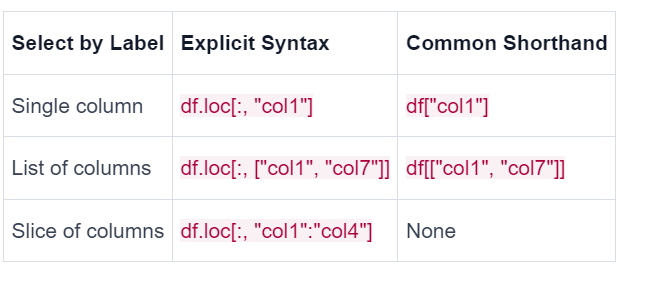

In [24]:
f500['country']

0
Walmart                               USA
State Grid                          China
Sinopec Group                       China
China National Petroleum            China
Toyota Motor                        Japan
                                   ...   
Teva Pharmaceutical Industries     Israel
New China Life Insurance            China
Wm. Morrison Supermarkets         Britain
TUI                               Germany
AutoNation                            USA
Name: country, Length: 500, dtype: object

In [25]:
f500[['revenues', 'years_on_global_500_list']]

,revenues,years_on_global_500_list
0,,
Walmart,485873,23
State Grid,315199,17
Sinopec Group,267518,19
China National Petroleum,262573,17
Toyota Motor,254694,23
...,...,...
Teva Pharmaceutical Industries,21903,1
New China Life Insurance,21796,2
Wm. Morrison Supermarkets,21741,13


In [26]:
f500.loc[:, 'ceo':'sector']

,ceo,industry,sector
0,,,
Walmart,C. Douglas McMillon,General Merchandisers,Retailing
State Grid,Kou Wei,Utilities,Energy
Sinopec Group,Wang Yupu,Petroleum Refining,Energy
China National Petroleum,Zhang Jianhua,Petroleum Refining,Energy
Toyota Motor,Akio Toyoda,Motor Vehicles and Parts,Motor Vehicles & Parts
...,...,...,...
Teva Pharmaceutical Industries,Yitzhak Peterburg,Pharmaceuticals,Health Care
New China Life Insurance,Wan Feng,"Insurance: Life, Health (stock)",Financials
Wm. Morrison Supermarkets,David T. Potts,Food and Drug Stores,Food & Drug Stores


## Selecting Rows from a DataFrame by Label

Now that we've mastered selecting columns using the labels of the Column Axis, let's tackle selecting rows using the labels of the Index Axis:

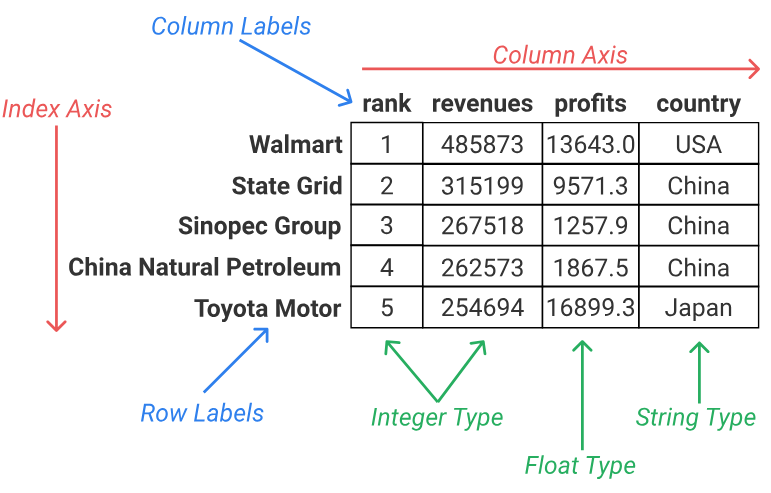

The syntax for selecting rows from a DataFrame is the same as for columns:

df.loc[row_label, column_label]

This syntax works when we want to select specific rows and columns. However, if we want to select all columns for specific rows, we can simplify this syntax a little by using:

This works because when we use this syntax, pandas automatically treats it as df.loc[row_label, :] to select all the columns for us. We'll use this slightly shorter syntax when selecting specific rows for all columns.

## Select a Single Row

In [31]:
f500.loc['Walmart']

rank                                             1
revenues                                    485873
revenue_change                                 0.8
profits                                    13643.0
assets                                      198825
profit_change                                 -7.2
ceo                            C. Douglas McMillon
industry                     General Merchandisers
sector                                   Retailing
previous_rank                                    1
country                                        USA
hq_location                        Bentonville, AR
website                     http://www.walmart.com
years_on_global_500_list                        23
employees                                  2300000
total_stockholder_equity                     77798
Name: Walmart, dtype: object

In [33]:
f500.loc['Sinopec Group']

rank                                             3
revenues                                    267518
revenue_change                                -9.1
profits                                     1257.9
assets                                      310726
profit_change                                -65.0
ceo                                      Wang Yupu
industry                        Petroleum Refining
sector                                      Energy
previous_rank                                    4
country                                      China
hq_location                         Beijing, China
website                     http://www.sinopec.com
years_on_global_500_list                        19
employees                                   713288
total_stockholder_equity                    106523
Name: Sinopec Group, dtype: object

Notice that the returned object is a Series because it's one-dimensional. This Series stores integer, float, and string values. Pandas uses the object dtype to accommodate all these values, as none of the numeric types could cater to them all.

## Select a List of Specific Rows

In [34]:
f500.loc[['Toyota Motor', 'Walmart']]

,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
0,,,,,,,,,,,,,,,,
Toyota Motor,5,254694,7.7,16899.3,437575,-12.3,Akio Toyoda,Motor Vehicles and Parts,Motor Vehicles & Parts,8,Japan,"Toyota, Japan",http://www.toyota-global.com,23,364445,157210
Walmart,1,485873,0.8,13643.0,198825,-7.2,C. Douglas McMillon,General Merchandisers,Retailing,1,USA,"Bentonville, AR",http://www.walmart.com,23,2300000,77798


Notice how the order of the rows in our selection has been preserved in the resulting DataFrame even though Walmart appears before Toyota Motor in our original DataFrame.

## Select a Slice of Rows

For row selection using slices, we can use the shortcut below. This is why we couldn't use this shortcut for columns - because it's reserved for use with rows!

In [37]:
f500['State Grid':'Toyota Motor']

,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
0,,,,,,,,,,,,,,,,
State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Energy,2,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456
Sinopec Group,3,267518,-9.1,1257.9,310726,-65.0,Wang Yupu,Petroleum Refining,Energy,4,China,"Beijing, China",http://www.sinopec.com,19,713288,106523
China National Petroleum,4,262573,-12.3,1867.5,585619,-73.7,Zhang Jianhua,Petroleum Refining,Energy,3,China,"Beijing, China",http://www.cnpc.com.cn,17,1512048,301893
Toyota Motor,5,254694,7.7,16899.3,437575,-12.3,Akio Toyoda,Motor Vehicles and Parts,Motor Vehicles & Parts,8,Japan,"Toyota, Japan",http://www.toyota-global.com,23,364445,157210


Notice that we don't need to use the .loc attribute or nested brackets here. Also, the last element in the slice is included, unlike with regular Python slicing. Selecting rows using slices is very clean! Of course, we could use the explicit syntax to select a slice of rows (df.loc["row1":"row5"]), but now that we know a shortcut, we'll want to use it whenever we can!

## Shortcut or No Shortcut?

Since they are very similar, it's very easy to confuse the shortcut syntax that doesn't use the .loc attribute with the explicit syntax that does. So how do we keep it all straight?! Well, there is no better way to learn than by practicing! But to set ourselves up for success, it helps to think about how often we'll perform one type of selection over the other.

For instance, are we more likely to select a single column or a single row when working with data? Which one should "get the shortcut?" With a little thought, it's clear that we'll select a single column more often than we'll select a single row, so selecting a column (df["col1"]) gets to use the shortcut syntax, not rows (df.loc["row1"]).

What about selection using a list? Again, it makes more sense for us to use the shortcut syntax for columns (df[["col1", "col5"]]) since we'll do that more often than selecting a list of specific rows (df.loc[["row1", "row5"]]).

But what about slices? This one favors rows since slices are continuous selections with no gaps; we'll want this functionality more often for rows (df["row1": "row5"]) than for columns since rows tend to be organized in some way, such as by date. The order of columns is rarely important, so the shortcut syntax for selection using a slice goes to the rows, not columns (df.loc[:, "col1":"col5"]).

It's important to note that these shortcuts only work if we're selecting either specific rows or specific columns, but not both. If we want to select specific rows and columns, we need to use the .loc attribute.

Here is a summary of the techniques we've learned for selecting rows:



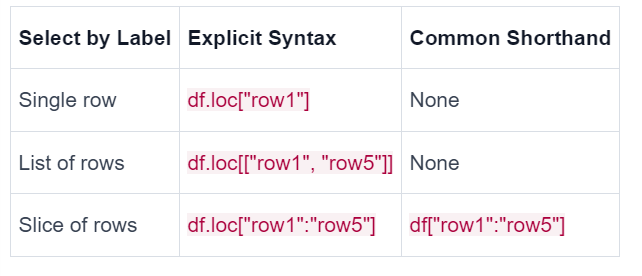

In [38]:
f500.loc['Toyota Motor']

rank                                                   5
revenues                                          254694
revenue_change                                       7.7
profits                                          16899.3
assets                                            437575
profit_change                                      -12.3
ceo                                          Akio Toyoda
industry                        Motor Vehicles and Parts
sector                            Motor Vehicles & Parts
previous_rank                                          8
country                                            Japan
hq_location                                Toyota, Japan
website                     http://www.toyota-global.com
years_on_global_500_list                              23
employees                                         364445
total_stockholder_equity                          157210
Name: Toyota Motor, dtype: object

In [39]:
f500.loc[['Anheuser-Busch InBev', 'Coca-Cola', 'Heineken Holding']]

,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
0,,,,,,,,,,,,,,,,
Anheuser-Busch InBev,206,45905,5.3,1241.0,258381,-85.0,Carlos Brito,Beverages,"Food, Beverages & Tobacco",211,Belgium,"Leuven, Belgium",http://www.ab-inbev.com,12,206633,71339
Coca-Cola,235,41863,-5.5,6527.0,87270,-11.2,James B. Quincey,Beverages,"Food, Beverages & Tobacco",206,USA,"Atlanta, GA",http://www.coca-colacompany.com,23,100300,23062
Heineken Holding,468,23044,-0.7,861.5,41469,-18.9,Jean-Francois van Boxmeer,Beverages,"Food, Beverages & Tobacco",459,Netherlands,"Amsterdam, Netherlands",http://www.theheinekencompany.com,11,73525,6958


In [40]:
f500['Tata Motors':'Nationwide']

,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
0,,,,,,,,,,,,,,,,
Tata Motors,247,40329,-4.2,1111.6,42162,-34.0,Guenter Butschek,Motor Vehicles and Parts,Motor Vehicles & Parts,226,India,"Mumbai, India",http://www.tatamotors.com,8,79558,8942
Aluminum Corp. of China,248,40278,6.0,-282.5,75089,NaN,Yu Dehui,Metals,Materials,262,China,"Beijing, China",http://www.chalco.com.cn,10,121146,2669
Mitsui,249,40275,1.6,2825.3,103231,NaN,Tatsuo Yasunaga,Trading,Wholesalers,245,Japan,"Tokyo, Japan",http://www.mitsui.com,23,42316,33500
Manulife Financial,250,40238,49.4,2209.7,537461,28.9,Donald A. Guloien,"Insurance: Life, Health (stock)",Financials,394,Canada,"Toronto, Ontario, Canada",http://www.manulife.com,15,34500,31197
China Minsheng Banking,251,40234,-5.2,7201.6,848389,-1.8,Zheng Wanchun,Banks: Commercial and Savings,Financials,221,China,"Beijing, China",http://www.cmbc.com.cn,5,58720,49297
China Pacific Insurance (Group),252,40193,2.2,1814.9,146873,-35.7,Huo Lianhong,"Insurance: Life, Health (stock)",Financials,251,China,"Shanghai, China",http://www.cpic.com.cn,7,97032,18960
American Airlines Group,253,40180,-2.0,2676.0,51274,-64.8,W. Douglas Parker,Airlines,Transportation,236,USA,"Fort Worth, TX",http://www.aa.com,23,122300,3785
Nationwide,254,40074,-0.4,334.3,197790,-42.4,Stephen S. Rasmussen,Insurance: Property and Casualty (Mutual),Financials,241,USA,"Columbus, OH",http://www.nationwide.com,23,34320,15537


## Series vs DataFrames

We have created both Series objects and DataFrame objects as we selected data from our f500 DataFrame. Let's take a minute to review these examples before we continue:

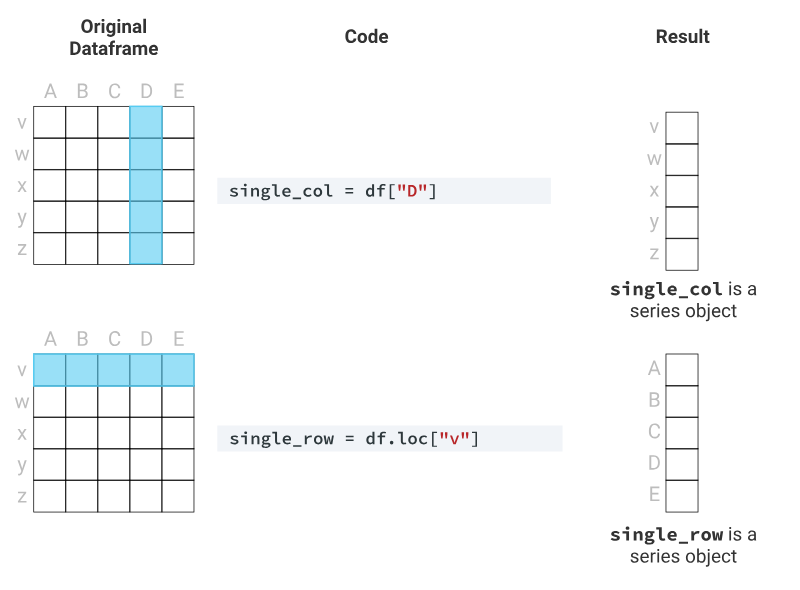

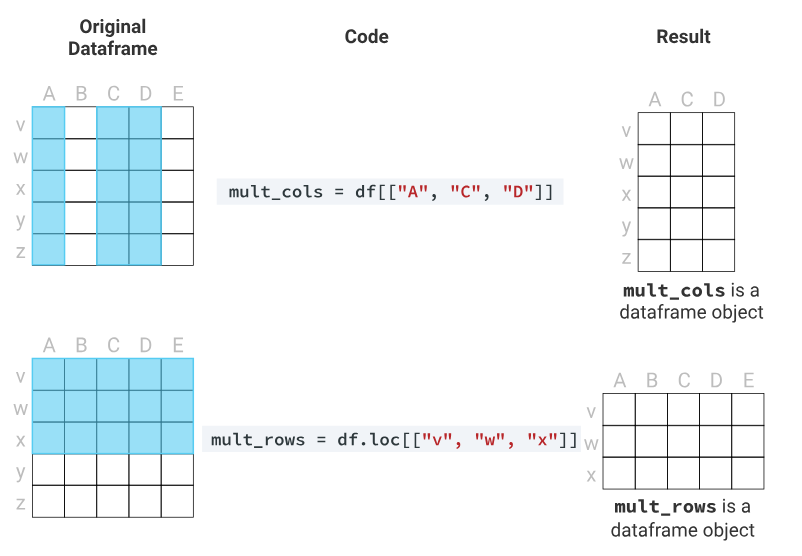

## Value Counts Method

Since Series and DataFrames are two distinct types of pandas objects, they each have their own special methods. Let's explore the powerful [Series.value_counts() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) to see how it counts the occurrences of each unique non-null value in a column. By default, this method will return the results from the most frequent value in the column to the least. Check out the official pandas documentation above to learn how to use the sort parameter to change the sort order.

## Series.value_counts() in Action

In [42]:
f500['sector'].value_counts()

sector
Financials                       118
Energy                            80
Technology                        44
Motor Vehicles & Parts            34
Wholesalers                       28
Health Care                       27
Food & Drug Stores                20
Transportation                    19
Telecommunications                18
Retailing                         17
Food, Beverages & Tobacco         16
Materials                         16
Industrials                       15
Aerospace & Defense               14
Engineering & Construction        13
Chemicals                          7
Household Products                 3
Media                              3
Hotels, Restaurants & Leisure      3
Business Services                  3
Apparel                            2
Name: count, dtype: int64

Amazing! The resulting Series tells us that the value "Financials" appears in the sectors Series 118 times, whereas "Apparel" only appears 2 times.

## value_counts() Method Meets DataFrame

What happens when we try using the value_counts() method directly on a DataFrame object instead of a Series object? Will it work? Let's find out!

First, we'll select the sector and industry columns of f500 to create another DataFrame called sectors_industries:

In [43]:
sectors_industries = f500[['sector', 'industry']]

In [45]:
sectors_industries.value_counts()

sector                         industry                                      
Financials                     Banks: Commercial and Savings                     51
Motor Vehicles & Parts         Motor Vehicles and Parts                          34
Energy                         Petroleum Refining                                28
Financials                     Insurance: Life, Health (stock)                   24
Food & Drug Stores             Food and Drug Stores                              20
Energy                         Mining, Crude-Oil Production                      18
Financials                     Insurance: Property and Casualty (Stock)          18
Telecommunications             Telecommunications                                18
Energy                         Utilities                                         18
Wholesalers                    Trading                                           15
Health Care                    Pharmaceuticals                                   1

It worked! However, our results from calling value_counts() on a DataFrame object look slightly different than the results we got when we called it on a Series object. This is because the [DataFrame.value_counts() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html) returns a Series object that uses a [MultiIndex](https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.html) instead of a single index like we got when using Series.value_counts().

In the example above, the counts returned are based on a combination of the unique non-null values found in both the sector and industry columns. For example, the combination of "Energy" in the sector column and "Petroleum Refining" in the industry column occurs 28 times in our data. However, the combination of "Energy" in the sector column and "Oil & Gas Equipment Services" in the industry column only occurs once.

Although the value_counts() method works on both pandas Series and DataFrame objects, not all methods support both types of objects. When in doubt, we should check the official pandas documentation for [Series attributes and methods](https://pandas.pydata.org/pandas-docs/stable/reference/series.html) or for [DataFrame attributes and methods](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) to make sure the attribute or method exists for the type of object we're working with.

In [53]:
country_counts = f500['country'].value_counts()
country_counts.index[0]

'USA'

In [57]:
hq_locations = f500['hq_location'].value_counts()
hq_locations.index[0].split(', ')[0]

'Beijing'

## Selecting Items from a Series by Label

In our previous exercise, we practiced using the Series.value_counts() method. We found the counts of each unique value in the country column for the entire f500 DataFrame, revealing "USA" as the country with the most companies on the Fortune 500 list:

In [58]:
countries = f500["country"]
country_counts = countries.value_counts()
print(country_counts)

country
USA             132
China           109
Japan            51
Germany          29
France           29
Britain          24
South Korea      15
Netherlands      14
Switzerland      14
Canada           11
Spain             9
Australia         7
Brazil            7
India             7
Italy             7
Taiwan            6
Russia            4
Ireland           4
Singapore         3
Sweden            3
Mexico            2
Malaysia          1
Thailand          1
Belgium           1
Norway            1
Luxembourg        1
Indonesia         1
Denmark           1
Saudi Arabia      1
Finland           1
Venezuela         1
Turkey            1
U.A.E             1
Israel            1
Name: count, dtype: int64


Now let's go deeper! What if we want to select the count for a single item, like India, from this Series? Or maybe we want to select the counts for a list of items, like a list of North American countries – how would we do that?

In [59]:
country_counts['India']

7

Similar to DataFrames, we can use the Series.loc[] attribute to select items from a Series using single labels, a list of labels, or a slice object. With pandas Series objects being 1D, we can take advantage of the shorthand syntax to omit the .loc attribute and use bracket shortcuts for all three types of selections. Assuming we have a pandas Series object called s, here are the different ways we can select items from it:

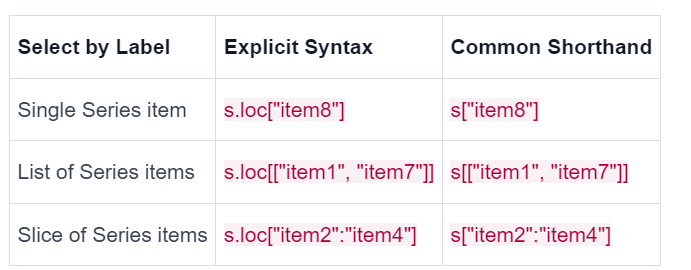

Keep in mind that when slicing in pandas, the last item in the slice is included in the results.

Let's use the country_counts Series that we created above to practice selecting data from pandas Series!

In [60]:
country_counts.loc['India']

7

In [61]:
country_counts.loc[['USA', 'Canada', 'Mexico']]

country
USA       132
Canada     11
Mexico      2
Name: count, dtype: int64

In [62]:
country_counts['Japan':'Spain']

country
Japan          51
Germany        29
France         29
Britain        24
South Korea    15
Netherlands    14
Switzerland    14
Canada         11
Spain           9
Name: count, dtype: int64

##  Summary Challenge

Let's look at a summary of all the different label selection techniques we've learned in this lesson:

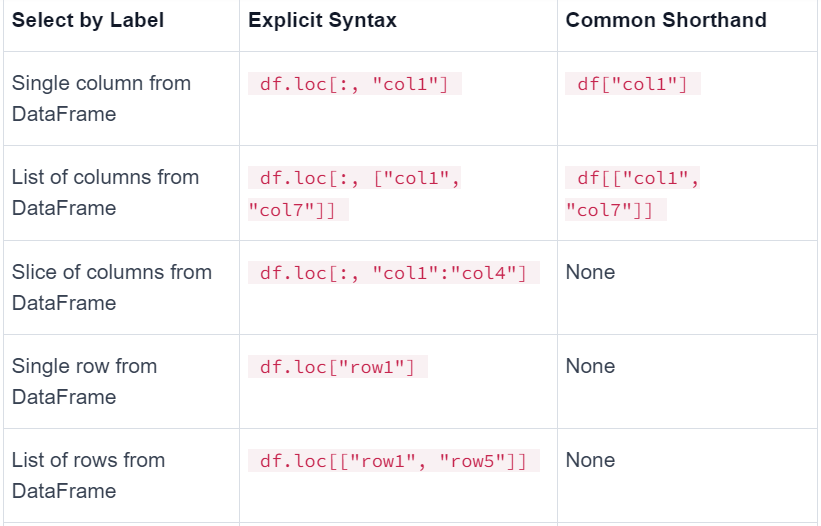

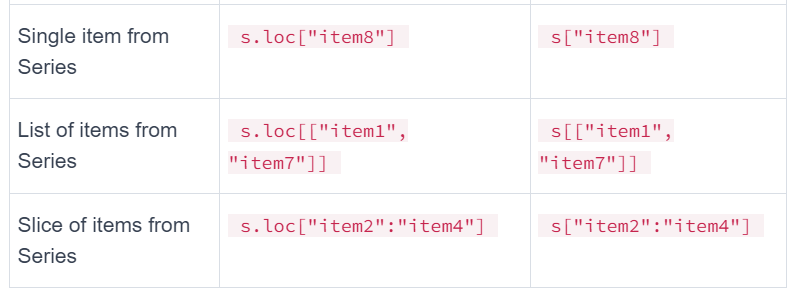

Until now, we've only selected either rows or columns, but not both at the same time. Howerever, it works as we would expect: by combining the syntax used for selecting rows with the syntax used for selecting columns. As mentioned earlier in the lesson, there is no common shorthand syntax for these types of selections; we need to use the .loc attribute and explicitly define the rows and columns to select – separated by a comma (,). As a reminder, the general syntax we use for all types of selections is:

df.loc[row_label, column_label]

For example, if we want to select a slice of rows across a list of columns, the syntax we use looks like this:

df.loc["row1":"row5", ["col1", "col3", "col7"]]

And if we want to select a single row across a slice of columns, the syntax we use looks like this:

df.loc["row3", "col3":"col7"]

In [64]:
f500.loc[['Aviva', 'HP', 'JD.com', 'BHP Billiton'], ['rank', 'previous_rank']]

,rank,previous_rank
0,,
Aviva,90,279
HP,194,48
JD.com,261,366
BHP Billiton,350,168


In [65]:
f500.loc[['National Grid', 'AutoNation'], ['rank', 'sector', 'country']]

,rank,sector,country
0,,,
National Grid,491,Energy,Britain
AutoNation,500,Retailing,USA


In [66]:
f500.loc[['Apple', 'Industrial & Commercial Bank of China', 'China Construction Bank', 'Agricultural Bank of China'], ['revenues', 'profit_change']]

,revenues,profit_change
0,,
Apple,215639,-14.4
Industrial & Commercial Bank of China,147675,-5.0
China Construction Bank,135093,-4.0
Agricultural Bank of China,117275,-3.6


In this lesson, we learned how to:

- Differentiate between pandas DataFrame and Series objects.
- Select data in pandas using axis labels.
- Generate a count of unique non-null values in a DataFrame column.